In [3]:
import pandas as pd
import numpy as np

# Preprocessing

In [4]:
from sklearn import datasets

In [5]:
data = datasets.load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


### Applying transformation to only specific columns of a df 

In [6]:
## here, let's asay we only want to apply the standard scaler to numerical columns (all except sex)
from sklearn.preprocessing import StandardScaler

xnum = X.loc[:,X.columns != "sex"]
xcat = X.loc[:,'sex']

sc= StandardScaler()
xnum = pd.DataFrame(sc.fit_transform(xnum), columns=xnum.columns)

X = pd.merge(xnum,xcat, left_index=True, right_index=True)
X.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,sex
0,0.800500,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989,0.050680
1,-0.039567,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479,-0.044642
2,1.793307,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154,0.050680
3,-1.872441,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823,-0.044642
4,0.113172,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568,-0.044642


## Elbow method and silouhette score plotting for Kmeans

### Elbow Method

In [7]:
# calculate within sum of square  for a range of values of k 
from sklearn.cluster import KMeans
wcss =  []
K = range(1, 11)
for i in K: 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))


WCSS for K=1 --> 3979.0000000000005
WCSS for K=2 --> 2775.5963547701886
WCSS for K=3 --> 2485.9913397453893
WCSS for K=4 --> 2263.382363960239
WCSS for K=5 --> 2089.1446098464526
WCSS for K=6 --> 1967.2418207359526
WCSS for K=7 --> 1865.1810576013133
WCSS for K=8 --> 1775.9960565770507
WCSS for K=9 --> 1702.7245646471767
WCSS for K=10 --> 1633.8865310467236


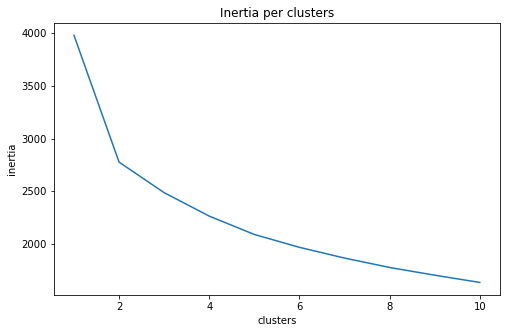

In [10]:
# now plot onto a figure
import seaborn as sns
from matplotlib import pyplot as plt
# Create DataFrame
wcss_frame = pd.DataFrame(wcss)

# create figure
palette = ['navy', 'teal', 'lightskyblue', "lightblue"]

fig, ax = plt.subplots(figsize=(8, 5)) #figure object 
   
ax = sns.lineplot(
    data = wcss_frame,
    x=K,
    y=wcss_frame.iloc[:,-1],
)

ax.set(xlabel='clusters', ylabel='inertia', title= "Inertia per clusters")

plt.show()

### Silhouette Score

In [14]:
# calculate the silhouette score
from sklearn.metrics import silhouette_score

# Computer mean silhouette score
sil = []

# Select K as a range starting at 2 as silhouette score cannot accept less than 2 labels 
K = range(2, 11)

## Run new K-Means with silhouette score
for i in range (2,11): 
    kmeans = KMeans(n_clusters= i, init = "k-means++", random_state = 0)
    kmeans.fit(X)
    sil.append(silhouette_score(X, kmeans.predict(X)))
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

Silhouette score for K=2 is 0.25349362397237013
Silhouette score for K=3 is 0.19621887548932898
Silhouette score for K=4 is 0.1484798371252692
Silhouette score for K=5 is 0.1473929885552849
Silhouette score for K=6 is 0.14715137634709022
Silhouette score for K=7 is 0.14859359096046962
Silhouette score for K=8 is 0.1412913715762747
Silhouette score for K=9 is 0.1438455723109901
Silhouette score for K=10 is 0.14362473768159847


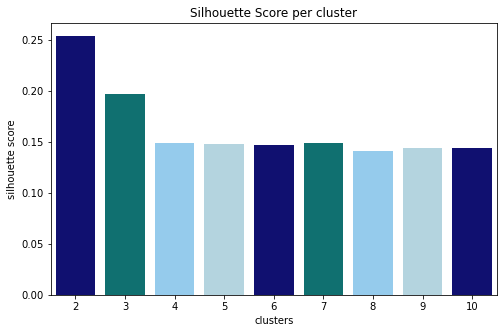

In [15]:
# Create a data frame 
cluster_scores=pd.DataFrame(sil)

#create figure
palette = ['navy', 'teal', 'lightskyblue', "lightblue"]
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.barplot(
    data = cluster_scores,
    x=list(K),
    y=cluster_scores.iloc[:, -1],
    palette = palette
)
ax.set(xlabel='clusters', ylabel='silhouette score', title= "Silhouette Score per cluster")

plt.show()
